In [1]:
import numpy as np
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from statsmodels.sandbox.stats.multicomp import TukeyHSDResults
import pickle
from sklearn.metrics import confusion_matrix

In [2]:
def Henon(n):
    a = 1.4
    b = 0.3
    x = np.zeros((n+1))
    y = np.zeros((n+1))
    for i in range(n):
        x[i+1] = 1-a*x[i]*x[i] + y[i]
        y[i+1] = b*x[i]
    return (x,y)

In [3]:
def Ventanas(x,size):
    size += 1
    arr = np.empty((0,size))
    for i in range(len(x) - size):
        arr = np.vstack((arr,x[i:i + size]))
    return (arr[:,:-1],arr[:,-1])

## Entrenamiento de Modelos

**kFold - Support Vector Regression**

In [4]:
def SVR_multiple():
    
    global resultados_train
    global resultados_test
    global res_train
    global res_test
    global model
    global train_indices
    global test_indices
    global etiquetas
    
    etiquetas.extend(['SVR linear C1',
                 'SVR poly 2º C1',
                 'SVR poly 3º C1',
                 'SVR poly 4º C1',
                 'SVR rfb auto C1',
                 'SVR rfb 0.05 C1',
                 'SVR rfb 0.1 C1',
                 'SVR rfb 0.2 C1'])
    etiquetas.extend(['SVR linear C100',
                 'SVR poly 2º C100',
                 'SVR poly 3º C100',
                 'SVR poly 4º C100',
                 'SVR rfb auto C100',
                 'SVR rfb 0.05 C100',
                 'SVR rfb 0.1 C100',
                 'SVR rfb 0.2 C100'])
    dicc = [{'C': 1.0, 'kernel': 'linear', 'degree': 1, 'gamma': 'auto', 'tol': 0.1},
            {'C': 1.0, 'kernel': 'poly', 'degree': 2, 'gamma': 'auto', 'tol': 0.1},
            {'C': 1.0, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'tol': 0.1},
            {'C': 1.0, 'kernel': 'poly', 'degree': 4, 'gamma': 'auto', 'tol': 0.1},
            {'C': 1.0, 'kernel': 'rbf', 'degree': 2, 'gamma': 'auto', 'tol': 0.1},
            {'C': 1.0, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.05, 'tol': 0.1},
            {'C': 1.0, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.1, 'tol': 0.1},
            {'C': 1.0, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.2, 'tol': 0.1},
            {'C': 100.0, 'kernel': 'linear', 'degree': 1, 'gamma': 'auto', 'tol': 0.1},
            {'C': 100.0, 'kernel': 'poly', 'degree': 2, 'gamma': 'auto', 'tol': 0.1},
            {'C': 100.0, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'tol': 0.1},
            {'C': 100.0, 'kernel': 'poly', 'degree': 4, 'gamma': 'auto', 'tol': 0.1},
            {'C': 100.0, 'kernel': 'rbf', 'degree': 2, 'gamma': 'auto', 'tol': 0.1},
            {'C': 100.0, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.05, 'tol': 0.1},
            {'C': 100.0, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.1, 'tol': 0.1},
            {'C': 100.0, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.2, 'tol': 0.1}]

    for i in range(len(dicc)):
        train_indices2 = []
        test_indices2 = []
        for j in range(3):
            for train_index, test_index in kf.split(X):
                X_train, X_test,y_train, y_test = X[train_index],X[test_index],y[train_index],y[test_index]
                train_indices2.append(train_index)
                test_indices2.append(test_index)
                alg = SVR(**dicc[i])
                alg.fit(X_train, y_train)
                model.append(alg)
                y_pred_test = alg.predict(X_test)
                y_pred_train = alg.predict(X_train)
                resultados_train.append(mean_squared_error(y_train,y_pred_train))
                resultados_test.append(mean_squared_error(y_test,y_pred_test))
        res_train = np.hstack((res_train, np.array(resultados_train,ndmin=2).T))
        res_test = np.hstack((res_test, np.array(resultados_test,ndmin=2).T))
        resultados_train = []
        resultados_test = []
        test_indices.append(test_indices2)

**kFold - Multi-layer Perceptron Regressor**

In [5]:
def MLP_multiple():
    
    global resultados_train
    global resultados_test
    global res_train
    global res_test
    global model
    global train_indices
    global test_indices
    global etiquetas
    
    etiquetas.extend(['MLPR sgd 10 relu',
                 'MLPR sgd 30 relu',
                 'MLPR sgd 50 relu',
                 'MLPR adam 10 relu',
                 'MLPR adam 30 relu',
                 'MLPR adam 50 relu'])
    etiquetas.extend(['MLPR sgd 10 tanh',
                 'MLPR sgd 30 tanh',
                 'MLPR sgd 50 tanh',
                 'MLPR adam 10 tanh',
                 'MLPR adam 30 tanh',
                 'MLPR adam 50 tanh'])
    dicc = [{'hidden_layer_sizes': (10,), 'solver': 'sgd',  'activation': 'relu','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (30,), 'solver': 'sgd',  'activation': 'relu','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (50,), 'solver': 'sgd',  'activation': 'relu','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (10,), 'solver': 'adam', 'activation': 'relu','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (30,), 'solver': 'adam', 'activation': 'relu','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (50,), 'solver': 'adam', 'activation': 'relu','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (10,), 'solver': 'sgd',  'activation': 'tanh','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (30,), 'solver': 'sgd',  'activation': 'tanh','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (50,), 'solver': 'sgd',  'activation': 'tanh','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (10,), 'solver': 'adam', 'activation': 'tanh','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (30,), 'solver': 'adam', 'activation': 'tanh','early_stopping': True, 'max_iter': 1500},
            {'hidden_layer_sizes': (50,), 'solver': 'adam', 'activation': 'tanh','early_stopping': True, 'max_iter': 1500}]

    for i in range(len(dicc)):
        train_indices2 = []
        test_indices2 = []
        for j in range(3):
            for train_index, test_index in kf.split(X):
                X_train, X_test,y_train, y_test = X[train_index],X[test_index],y[train_index],y[test_index]
                train_indices2.append(train_index)
                test_indices2.append(test_index)
                alg = MLPRegressor(**dicc[i])
                alg.fit(X_train, y_train)
                model.append(alg)
                y_pred_test = alg.predict(X_test)
                y_pred_train = alg.predict(X_train)
                resultados_train.append(mean_squared_error(y_train,y_pred_train))
                resultados_test.append(mean_squared_error(y_test,y_pred_test))
        res_train = np.hstack((res_train, np.array(resultados_train,ndmin=2).T))
        res_test = np.hstack((res_test, np.array(resultados_test,ndmin=2).T))
        resultados_train = []
        resultados_test = []
        train_indices.append(train_indices2)
        test_indices.append(test_indices2)

In [6]:
#definicion de variables globales.
Xinicial,_ = Henon(5000)    
for t_ventana in (25,50):    
    kf = KFold(n_splits=10,shuffle=True)
    resultados_train = []
    resultados_test = []
    model = []
    res_train = np.empty((30,0))
    res_test = np.empty((30,0))
    train_indices = []
    test_indices = []
    etiquetas = []
    scaler = StandardScaler()
    
    X,y = Ventanas(Xinicial, t_ventana)
    X = scaler.fit_transform(X)
    y = (y - np.mean(y))/np.std(y)

    %time SVR_multiple()
    %time MLP_multiple()
    
    #Persistencia
    with open('p4_henon-res_test_{}.bin'.format(t_ventana),'wb') as file:
        pickle.dump(res_test, file)
    with open('p4_henon-train_indices_{}.bin'.format(t_ventana),'wb') as file:
        pickle.dump(train_indices, file)
    with open('p4_henon-test_indices_{}.bin'.format(t_ventana),'wb') as file:
        pickle.dump(test_indices, file)
    with open('p4_henon-models_{}.bin'.format(t_ventana),'wb') as file:
        pickle.dump(model, file)

CPU times: user 5.17 s, sys: 0 ns, total: 5.17 s
Wall time: 5.17 s


/home/diego/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/diego/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 1min 33s, sys: 438 ms, total: 1min 34s
Wall time: 1min 34s
CPU times: user 916 ms, sys: 1e+03 ns, total: 916 ms
Wall time: 916 ms
CPU times: user 46.9 s, sys: 0 ns, total: 46.9 s
Wall time: 46.9 s


**Persistencia**

In [17]:
with open('p4_henon-res_test_25.bin','rb') as file:
    res_test = pickle.load(file)

**Test de normalidad**  
Rechazamos normalidad, realizamos el test no paramétrico de Kruskal-Wallis en lugar de un Anova 

In [18]:
np.apply_along_axis(lambda x: stats.shapiro(x)[1], axis=0, arr=res_test)

array([4.30830078e-05, 4.28321324e-02, 5.10826297e-02, 7.50823840e-02,
       2.06763409e-02, 2.19719615e-02, 2.62150373e-02, 4.47124392e-01,
       6.65682554e-01, 2.69603506e-02, 8.55654944e-03, 9.26606543e-03,
       5.95204830e-02, 1.54023496e-02, 7.72894770e-02, 1.11098520e-01,
       4.69925284e-01, 9.58248377e-02, 3.24307412e-01, 6.89455569e-02,
       4.54360396e-02, 2.87630805e-03, 5.79828359e-02, 1.47948205e-01,
       2.97158696e-02, 1.71597674e-02, 6.25629947e-02, 3.73377523e-04])

**Test de Kruskal-Wallis**  
Rechazamos que las precisiones sean similares

In [19]:
print(stats.kruskal(*zip(*list(res_test))))

KruskalResult(statistic=165.2901704320252, pvalue=8.126950343363039e-22)


In [20]:
labels = [etiquetas[i] for i in range(res_test.shape[1]) for _ in range(res_test.shape[0])]
arr_test = res_test.flatten('F')
resultados = pairwise_tukeyhsd(arr_test,labels)
# resultados.summary()

In [21]:
#seleccionamos el que tiene mejor media y vemos en el anterior cuales son iguales
best_group = np.argmin(np.mean(res_test, axis = 0))
best_group = etiquetas[int(best_group)]

Figure(720x432)


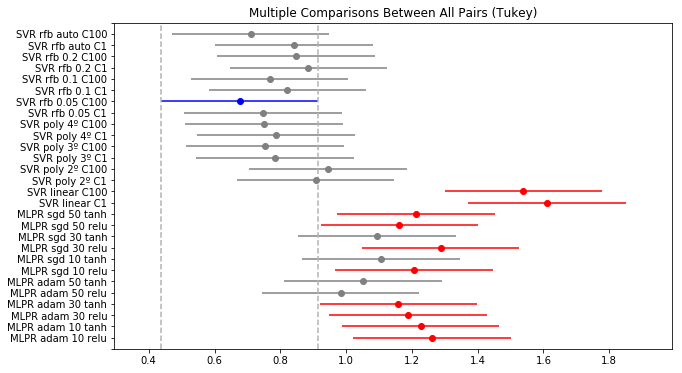

In [22]:
print(resultados.plot_simultaneous(comparison_name=best_group))

In [23]:
resultados = resultados._results_table.data

In [24]:
group1 = resultados[0].index('group1')
group2 = resultados[0].index('group2')
reject = resultados[0].index('reject')
best_groups = []
for row in resultados[1:]:
    if (row[group1] == str(best_group) or row[group2] == str(best_group)) and not row[reject]:
        best_groups.append(row[group1])
        best_groups.append(row[group2])
best_groups.append(best_group)
best_groups = set(best_groups)
sorted(best_groups)

['MLPR adam 50 relu',
 'MLPR adam 50 tanh',
 'MLPR sgd 10 tanh',
 'MLPR sgd 30 tanh',
 'SVR poly 2º C1',
 'SVR poly 2º C100',
 'SVR poly 3º C1',
 'SVR poly 3º C100',
 'SVR poly 4º C1',
 'SVR poly 4º C100',
 'SVR rfb 0.05 C1',
 'SVR rfb 0.05 C100',
 'SVR rfb 0.1 C1',
 'SVR rfb 0.1 C100',
 'SVR rfb 0.2 C1',
 'SVR rfb 0.2 C100',
 'SVR rfb auto C1',
 'SVR rfb auto C100']

**Nos quedamos con el más sencillo**  
El cual asumimos que es el MLPR con:
- sgd (Stochastic Gradient Descent)  
- relu (Rectified linear unit function)  
- 10 neuronas en la capa oculta

In [25]:
for ind, tag in enumerate(best_groups):
    mean_test = np.mean(res_test[:,ind])
    std_test = np.std(res_test[:,ind])
    print('{}: {:.2f} +- {:.2f}'.format(tag, mean_test, std_test))

MLPR sgd 30 tanh: 1.61 +- 0.73
MLPR sgd 10 tanh: 0.91 +- 0.43
SVR rfb auto C100: 0.78 +- 0.38
SVR poly 3º C1: 0.79 +- 0.38
SVR rfb 0.2 C100: 0.84 +- 0.35
SVR rfb auto C1: 0.75 +- 0.38
SVR rfb 0.05 C100: 0.82 +- 0.41
SVR rfb 0.1 C1: 0.89 +- 0.36
SVR poly 4º C100: 1.54 +- 0.50
SVR poly 4º C1: 0.94 +- 0.43
SVR poly 3º C100: 0.75 +- 0.44
SVR rfb 0.2 C1: 0.75 +- 0.42
SVR rfb 0.1 C100: 0.71 +- 0.30
MLPR adam 50 relu: 0.68 +- 0.35
SVR rfb 0.05 C1: 0.77 +- 0.36
MLPR adam 50 tanh: 0.85 +- 0.33
SVR poly 2º C100: 1.21 +- 0.49
SVR poly 2º C1: 1.29 +- 0.59
